Linear Regression MSE: 4.155121037542665
Ridge Regression MSE: 4.161579468443381
Lasso Regression MSE: 22.743744613828934
SVM Regression MSE: 5.7262379062190405
KNN Regression MSE (Bootstrapped, 100 samples): 5.549305


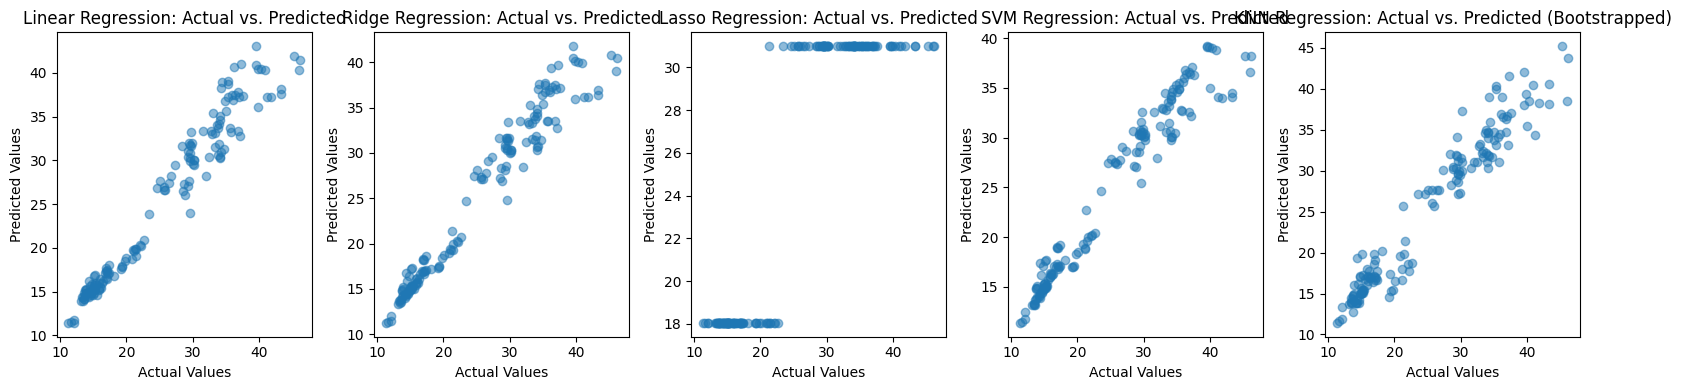

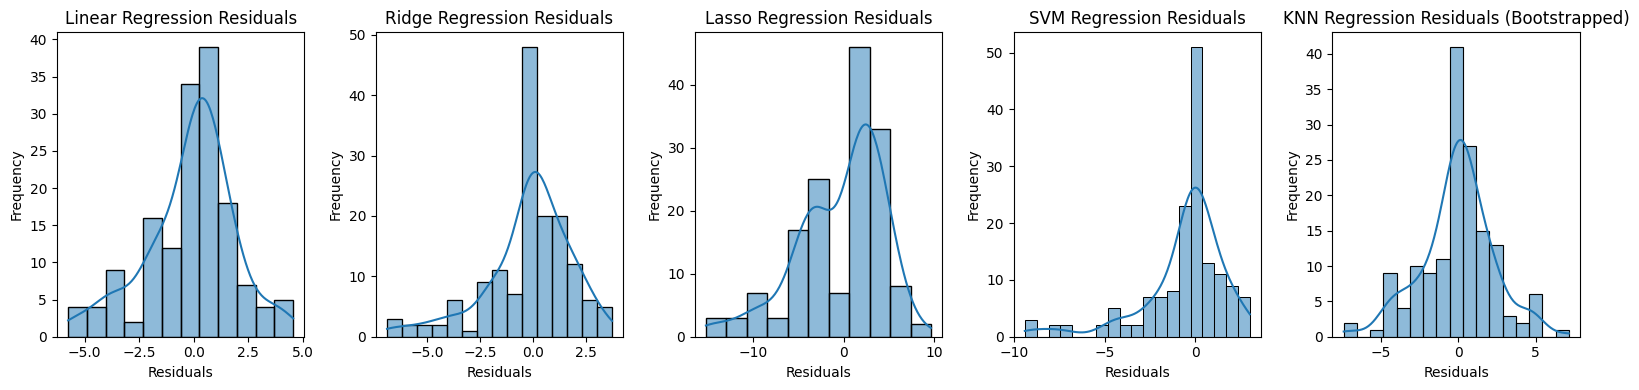

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv("/content/archive.zip")

# Split the data into X (features) and y (target variable)
X = df.iloc[:, :-1]  # Assuming the last column is your target variable
y = df.iloc[:, -1]

# Perform Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)

# Ridge Regression
ridge_reg_model = Ridge(alpha=1.0)
ridge_reg_model.fit(X_train, y_train)
ridge_reg_predictions = ridge_reg_model.predict(X_test)
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_predictions)

# Lasso Regression
lasso_reg_model = Lasso(alpha=1.0)
lasso_reg_model.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg_model.predict(X_test)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_predictions)

# SVM Regression
svm_reg_model = SVR(kernel='linear')
svm_reg_model.fit(X_train, y_train)
svm_reg_predictions = svm_reg_model.predict(X_test)
svm_reg_mse = mean_squared_error(y_test, svm_reg_predictions)

# K-Nearest Neighbors (KNN) Regression with Bootstrapping
n_bootstrap_samples = 100  # You can adjust the number of bootstrap samples
knn_reg_mses = []

for i in range(n_bootstrap_samples):
    random_indices = np.random.choice(X_train.shape[0], size=X_train.shape[0], replace=True)
    X_bootstrap = X_train[random_indices]
    y_bootstrap = y_train.iloc[random_indices]

    knn_reg_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
    knn_reg_model.fit(X_bootstrap, y_bootstrap)
    knn_reg_predictions = knn_reg_model.predict(X_test)
    knn_reg_mse = mean_squared_error(y_test, knn_reg_predictions)
    knn_reg_mses.append(knn_reg_mse)

print("Linear Regression MSE:", linear_reg_mse)
print("Ridge Regression MSE:", ridge_reg_mse)
print("Lasso Regression MSE:", lasso_reg_mse)
print("SVM Regression MSE:", svm_reg_mse)
print(f"KNN Regression MSE (Bootstrapped, {n_bootstrap_samples} samples): {np.mean(knn_reg_mses):.6f}")

# Plot actual vs. predicted values for all regression models
plt.figure(figsize=(16, 4))

plt.subplot(1, 5, 1)
plt.scatter(y_test, linear_reg_predictions, alpha=0.5)
plt.title("Linear Regression: Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.subplot(1, 5, 2)
plt.scatter(y_test, ridge_reg_predictions, alpha=0.5)
plt.title("Ridge Regression: Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.subplot(1, 5, 3)
plt.scatter(y_test, lasso_reg_predictions, alpha=0.5)
plt.title("Lasso Regression: Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.subplot(1, 5, 4)
plt.scatter(y_test, svm_reg_predictions, alpha=0.5)
plt.title("SVM Regression: Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.subplot(1, 5, 5)
plt.scatter(y_test, knn_reg_predictions, alpha=0.5)
plt.title(f"KNN Regression: Actual vs. Predicted (Bootstrapped)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()

# Plot residuals (predicted - actual) for all regression models
residuals_linear = linear_reg_predictions - y_test
residuals_ridge = ridge_reg_predictions - y_test
residuals_lasso = lasso_reg_predictions - y_test
residuals_svm = svm_reg_predictions - y_test
residuals_knn = knn_reg_predictions - y_test

plt.figure(figsize=(16, 4))

plt.subplot(1, 5, 1)
sns.histplot(residuals_linear, kde=True)
plt.title("Linear Regression Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.subplot(1, 5, 2)
sns.histplot(residuals_ridge, kde=True)
plt.title("Ridge Regression Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.subplot(1, 5, 3)
sns.histplot(residuals_lasso, kde=True)
plt.title("Lasso Regression Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.subplot(1, 5, 4)
sns.histplot(residuals_svm, kde=True)
plt.title("SVM Regression Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.subplot(1, 5, 5)
sns.histplot(residuals_knn, kde=True)
plt.title("KNN Regression Residuals (Bootstrapped)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
